In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os 
import time

train_df = pd.read_csv('/Users/itsdeepans/Desktop/fashion-mnist_train.csv',sep=',') 
test_df = pd.read_csv('/Users/itsdeepans/Desktop/fashion-mnist_test.csv', sep = ',')

train_df.head(10)
train_data= np.array(train_df, dtype= 'float32') 
test_data= np.array(test_df, dtype= 'float32')
x_train = train_data[:,1:]/255 
y_train = train_data[:,0]
x_test= test_data[:,1:]/255 
y_test=test_data[:,0]

# Example of training label content
print(y_train[0], y_train[43], y_train[1923]) 
print("Minimum value of training labels", y_train.min()) 
print("Maximum value of training labels", y_train.max())


2.0 6.0 4.0
Minimum value of training labels 0.0
Maximum value of training labels 9.0


In [2]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345) 
x_train.shape, x_validate.shape,y_train.shape,y_validate.shape

((48000, 784), (12000, 784), (48000,), (12000,))

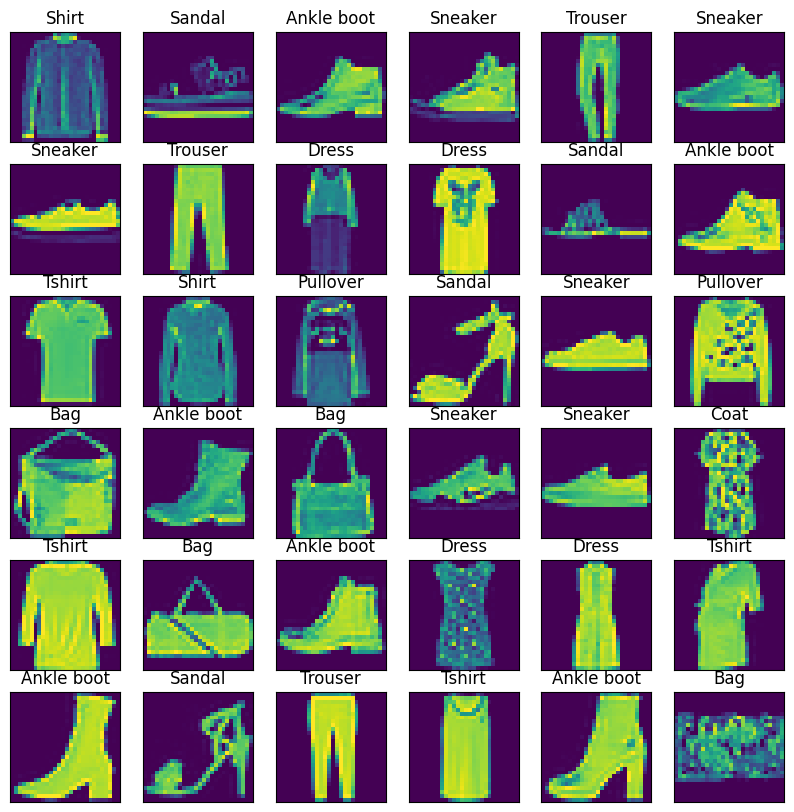

In [3]:
class_names= ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10)) 
for i in range(36):
    plt.subplot(6,6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(x_train[i].reshape((28,28))) 
    label_index= int(y_train[i]) 
    plt.title(class_names[label_index])
plt.show()

In [4]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

x_train= x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape) 
x_train.shape, x_test.shape, x_validate.shape

# Alexnet
model= tf.keras.Sequential([Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation= 'relu', input_shape= image_shape),
BatchNormalization(),
MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'), BatchNormalization(),
MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'), BatchNormalization(),
Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'), BatchNormalization(),
Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'), BatchNormalization(),
MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
Flatten(),
Dense(4096, activation='relu'),
Dropout(0.5),
Dense(4096, activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax')
])
model.summary()

/Users/itsdeepans/Desktop/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 5, 5, 96)       │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 5, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,604,426 (82.41 MB)

 Trainable params: 21,601,674 (82.40 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [5]:
from tensorflow.keras.optimizers import SGD

def lr_schedule(epoch): 
    lr = 0.01
    if epoch > 50: 
        lr *= 0.1
    elif epoch > 75: 
        lr *= 0.01
    return lr

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True) 
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"]) 
from tensorflow.keras.callbacks import LearningRateScheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# train!
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min') 
history= model.fit(x_train, y_train, epochs=5, verbose=1, callbacks=[early_stopping_cb],
validation_data=(x_validate, y_validate))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 90ms/step - accuracy: 0.7078 - loss: 0.8576 - val_accuracy: 0.8383 - val_loss: 0.4426
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 91ms/step - accuracy: 0.8410 - loss: 0.4396 - val_accuracy: 0.8555 - val_loss: 0.3878
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 156s 104ms/step - accuracy: 0.8607 - loss: 0.3823 - val_accuracy: 0.8658 - val_loss: 0.3563
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 152s 101ms/step - accuracy: 0.8729 - loss: 0.3444 - val_accuracy: 0.8746 - val_loss: 0.3441
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 163s 109ms/step - accuracy: 0.8804 - loss: 0.3217 - val_accuracy: 0.8696 - val_loss: 0.3511


In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss',color='r') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model_evaluation_results = model.evaluate(x_test, y_test, batch_size=32, verbose=2) 
print("The test loss is", model_evaluation_results[0])
print("The test accuracy is", model_evaluation_results[1])

In [ ]:
# Prediction on test images using model.predict() method 
practical_test_images = x_test[:10]
prediction_probabilites = model.predict(practical_test_images) 
prediction_probabilites[:3]

In [ ]:
# Clean up model prediction using argmax to find the index of the largest probablity 
def derive_predicted_classes(prediction_probabilites):
    batch_prediction = []
    for vector in prediction_probabilites:
        batch_prediction.append(np.argmax(vector)) 
    return batch_prediction
    
model_prediction = derive_predicted_classes(prediction_probabilites) 
model_prediction

In [ ]:
# Visualise the prediction result 
plt.figure(figsize=(10,10))
for i in range(len(practical_test_images)):
    plt.subplot(5,5, i+1)
    plt.axis("off")
    plt.grid(False) 
    plt.imshow(practical_test_images[i]) 
    plt.title(class_names[model_prediction[i]])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reshape x_test to have the correct shape
x_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)

# Calculate accuracy score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
accuracy = accuracy_score(y_test, y_pred_classes) 
print("Accuracy:", accuracy)

In [ ]:
# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names) 
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels') 
plt.title('Confusion Matrix') 
plt.show()

In [ ]:
# Generate and display classification report
classification_rep = classification_report(y_test, y_pred_classes, target_names=class_names) 
print("Classification Report:\n", classification_rep)